**資科工碩 0756110 李東霖**

# Introduction

In [1]:
import dataloader
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
def show_data(data):
    if len(data.shape) == 3:
        data = data[0]
        
    if len(data.shape) != 2:
        raise AttributeError("shape no ok")
        return
    
    plt.figure(figsize=(10,4))
    for i in range(data.shape[0]):
        plt.subplot(2,1, i+1)
        plt.ylabel("Channel "+str(i+1), fontsize=15)
        plt.plot(np.array(data[i, :]))
    plt.show()
    
def gen_dataset(train_x, train_y, test_x, test_y):
    datasets = []
    for x, y in [(train_x, train_y), (test_x, test_y)]:
        x = torch.stack(
            [torch.Tensor(x[i][0]) for i in range(x.shape[0])]
        )
        y = torch.stack(
            [torch.Tensor(y[i:i+1]) for i in range(y.shape[0])]
        )
        datasets += [TensorDataset(x, y)]
        
    return datasets

In [3]:
train_dataset, test_dataset = gen_dataset(*dataloader.read_bci_data())

(1080, 1, 2, 750) (1080,) (1080, 1, 2, 750) (1080,)


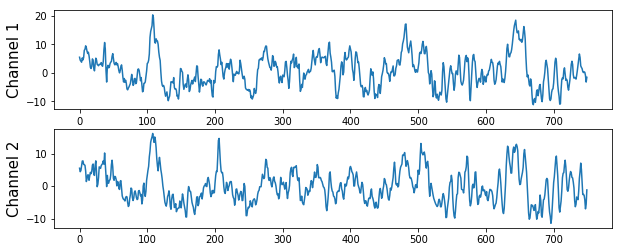

In [4]:
show_data(train_dataset[0][0])